## Basics of Differential Equations

(This presentation assumes knowledge of differential and integral calculus of a single variable. For those who have studied diffEQs before, this material covers first order, non-homogeneous, ordinary diffEQs. If you don't know what that means, no worries. Prior exposure to diffEQs is neither assumed nor necessary. If viewing this as a Jupyter notebook, select Cell > Run All so all the libraries are loaded before re-running any of the cells.) 

The study of differential equations began with real world problems. Consider how a relatively hot object, like a cup of coffee, cools to the abient room temperature when left on a table for a long enough period of time. How do we model this mathematically?

For some object, assume the temperature _T_ at some time _t_ decreases to some ambient temperature (we'll assume 0 for simplicity). When taking the temperature at time 0, the value might be 180 degrees. At time 10, it might be 144 degrees. At time 20, it might be 116 degrees. At time 30, it might be 92 degrees, and so on. 

In looking at the data, you might notice that for each time interval of 10, the temperature is 20% lower than it was at the last measurement. Continuing the trend and graphing, we have this:

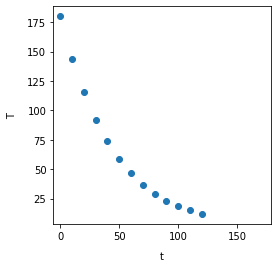

In [1]:
# the examples in this notebook are designed to be evaluated in sequence from beginning to end

# uncomment these to filter Matplotlib deprecation warnings for sympy
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
T = [180, 144, 116, 92, 74, 59, 47, 37, 29, 23, 19, 15, 12]
plt.scatter(t,T)
plt.xlabel("t",labelpad=10)
plt.ylabel("T",labelpad=10)
plt.axis('square');
plt.show()

If we imagine a continuous function that connects these points, at any of the points, the rate of change of the function of temperature is given by this equation:

$
\hspace{0.5in} T(t) = 0.8T_{(t - 10)}
$

Understand what this means. At any time _t_, the current temperature is 80% of the previous temperature taken 10 time units ago. If we change this internal to 1 time unit ago and assume a linear interpolation of the _T_ values (this is just an approximation, because the function clearly isn't piecewise-linear), just take -20% and divide it by 10, and the change is -2% per time unit. 

Taking this incremental approximation and somewhat cavalierly converting it to an equation involving the time rate of change of _T_ (or the derivative of _T_ with respect to _t_), we have this:

$
\hspace{0.5in} T'(t) = -0.02T(t)
$

or, equivalently:

$
\hspace{0.5in}(1)\hspace{0.25in}T'(t) + 0.02T(t) = 0,\ T(0) = 180
$

The question is, what is $T(t)$, such that this equation is true? (In other words, what is the approximate equation fitting the data shown above?)

The previous equation is called an unforced linear differential equation, and it has this general form:

$
\hspace{0.5in}(2)\hspace{0.25in}y'(t) + ry(t) = 0 
$

This form is foundational in the study of differential equations, and it models many phenomena. 

This is the solution for equation (2), where $s = y(0)$, and _s_ can be considered a starting value when _t_ represents time:

$
\hspace{0.5in}(3)\hspace{0.25in}y(t) = se^{-rt}
$

(Note: Equations are frequently referred to simply by "(N)", where N is an integer.)

Given a value _r_, to solve (2), a $y(t)$ is needed that gives solutions for all _t_, and (3) is such a solution.

To show this, assume this is a solution:

$
\hspace{0.5in}(4)\hspace{0.25in}g(t) = ke^{zt}
$

Now substitute (4) into (2) and do the differentiation:

$
\hspace{0.5in} kze^{zt} + rke^{zt} = 0
$

Solving for _z_, we get $z = -r$. By substituting _-r_ for _z_ in (4) and letting $k = s$, (3) is confirmed as the solution.

Here is a method for doing this in Python:

In [2]:
import sympy as sym
r, t = sym.symbols('r t')
g = sym.Function('g')
ode = sym.Eq(sym.diff(g(t), t), -r*g(t))
sol = sym.dsolve(ode, g(t))
sol

Eq(g(t), C1*exp(-r*t))

This result is equivalent to (4) or (3). 

Now we verify (3) produces 0 if substitued into (2):

In [3]:
r, s, t = sym.symbols('r s t')
y = s*sym.exp(-r*t)
print(sym.diff(y, t) + r*y)

0


So (3) is a solution of (2).

This information can be used to solve our original temperature cooling equation:

$
\hspace{0.5in}(1)\hspace{0.25in}T'(t) + 0.02T(t) = 0,\ T(0) = 180
$

We now know the general form of the solution is $T(t) = se^{-0.02t}$. With $t = 0$, from our original data we have $180 = se^{-0.02*0}$; so $s = 180$. The solution is:

$\hspace{0.5in}(5)\hspace{0.25in}T(t) = 180e^{-0.02t}$

Here is a graph of the solution versus the original data:


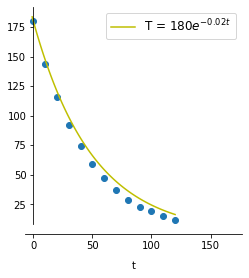

In [4]:
# legend font size adjustment
SMALL_SIZE=12
plt.rc('legend', fontsize=SMALL_SIZE)

# domain
t = np.linspace(-1,120,120)
# the solution to the approximate equation
T = 180*np.exp(-0.02*t)

# attributes of the graph axes
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

# plot the function
plt.plot(t,T, 'y', label="T = $180e^{-0.02t}$")
plt.axis('square');
plt.xlabel("t",labelpad=10)
plt.legend(loc='upper right')

# plot the dots
t = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
T = [180, 144, 116, 92, 74, 59, 47, 37, 29, 23, 19, 15, 12]
plt.scatter(t,T);


Just for a sanity check against the original data, let's calculate _T(50)_ and _T(100)_. For the original data set, these values are 59 and 19, respectively.

In [5]:
print("{0:.1f}".format(180*np.exp(-0.02*50)))    
print("{0:.1f}".format(180*np.exp(-0.02*100)))

66.2
24.4


As we said initially, equation (1) is an approximation, and the solution falls on the high side of the data. Nevertheless, this example is a useful beginning for exploring this type of differential equation.

The preceding example represents something called called exponential decay. It relates to things like temperature cooling, capacitor discharge, and half-life of a radioactive element, among other natural phenomena.

If $r < 0$, then the differential equation would be this:

$
\hspace{0.5in} T'(t) - 0.02T(t) = 0
$

and the solution would be:

$
\hspace{0.5in} T(t) = 180e^{0.02t}
$

with the following graph:

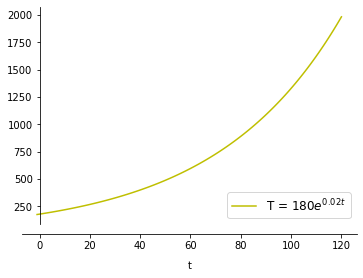

In [6]:
t = np.linspace(-1,120,120)
T = 180*np.exp(0.02*t)

fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.plot(t,T, 'y', label="T = $180e^{0.02t}$")
plt.xlabel("t",labelpad=10)
plt.legend(loc='lower right')
plt.show()

This is called exponential growth. It relates to things like population growth, compound interest, and atomic collisions during fission.

Going back to our equation (1), if $s < 0$:

$
\hspace{0.5in} T'(t) + 0.02T(t) = 0,\ y(0) = -180
$

and the solution would be:

$
\hspace{0.5in} T(t) = -180e^{-0.02t}
$

with the following graph:

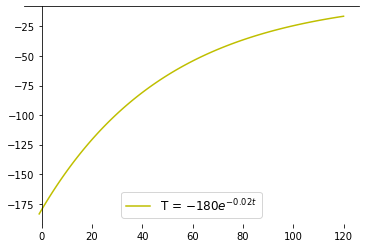

In [7]:
T = -180*np.exp(-0.02*t)

fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_visible(False)
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.plot(t,T, 'y', label="T = $-180e^{-0.02t}$")
plt.legend(loc='lower center')
plt.show()

This is another type of exponential growth--one that has an upper bound. This as a reflection of (5) across the x-axis. This graph could represent the warming of an object to an ambient temperature.

Previously, we saw this differential equation:

$
\hspace{0.5in}(2)\hspace{0.25in}y'(t) + ry(t) = 0 
$

has solutions of this form:

$
\hspace{0.5in}(4)\hspace{0.25in} g(t) = ke^{-rt}
$

where $g(t)$ can be substituted for $y(t)$. When $r > 0$, $g(t)$ decreases and conversely, when $r < 0$, $g(t)$ increases.

If we change (2) to this:

$
\hspace{0.5in}(6)\hspace{0.25in} y'(t) + ry(t) = f(t) 
$

with $y(0) = k$, we have what is called a forced exponential differential equation. Such equations have this solution:

$
\hspace{0.5in}(7)\hspace{0.25in} y(t) = ke^{-rt} + e^{-rt}\int\limits_0^t e^{rs}f(s)\,\mathrm{d} s
$

if the integral can be evaluated (which frequently, it can't).

Let's demonstrate this in Python.

In [8]:
r, s = sym.symbols('r s')
y = sym.Function('y')(s)    
f = sym.Function('f')(s)
y_ = sym.Derivative(y, s)
# y' + ry - f = 0
sol = sym.dsolve(y_ + r*y - f, y)
sol
# sym.pprint(sol)

Eq(y(s), (C1 + Integral(f(s)*exp(r*s), s))*exp(-r*s))

This has the same form as (7) with $C_1 = k$ but without the bounds of integration.

Using (7), we can construct the left side of (6) and evaluate (6) at $t = 0$:

In [9]:
k, s, t = sym.symbols('k s t')
f = sym.Function('f')(t)
# formulate the left side of equation (5)
I = sym.Integral(sym.exp(r*s)*f,(s,0,t))
I_eval = I.doit()
y = sym.expand(sym.exp(-r*t)*(k + I_eval))
# pprint(y)
y_prime = sym.diff(y,t)
s = y_prime + r*y
# pprint(simplify(s))
def eval_s(t_): 
    return s.subs([(t, t_)])
print(eval_s(0))

f(0)


As we can see, $y'(0) + ry(0) = f(0)$ when $y(t) = ke^{-rt} + e^{-rt}\int\limits_0^t e^{rs}f(s) \, \mathrm{d} s\,$.

Why does $y(t) = ke^{-rt} + e^{-rt}\int\limits_0^t e^{rs}f(s) \, \mathrm{d} s$ work?

If we start with $y'(s) + ry(s) = f(s)$ and multiply through by $e^{rs}$, we get this:

$\hspace{0.5in} e^{rs}y'(s) + e^{rs}ry(s) = e^{rs}f(s)$

which is the same as this:

$\hspace{0.5in} \frac{\mathrm{d}\,e^{rs}y(s)}{\mathrm{d}s} = e^{rs}f(s)$

Integrating both sides with respect to $s$ on the interval from 0 to $t$, we get $y(t) = ke^{-rt} + e^{-rt}\int\limits_0^t e^{rs}f(s) \, \mathrm{d} s\,$, which we said is the solution to a forced exponential differential equation.

While this is fine on paper, in general, the integral may not be doable analytically. But let's look at some that are doable.

Here is an example forced equation with analytic and graphical solutions:

$\hspace{0.5in} y'(t) + 2y(t) = 3e^{-0.3t}$ for $y(0) = 5$

In [10]:
sym.init_printing()
from sympy.plotting import plot
t = sym.symbols('t')
y = sym.Function('y')
y1 = sym.Derivative(y(t), t)
eqdiff = y1 + 2*y(t) - 3*sym.exp(-0.3*t)
sol1 = sym.dsolve(eqdiff, y(t), ics={y(0): '5'})
sol1

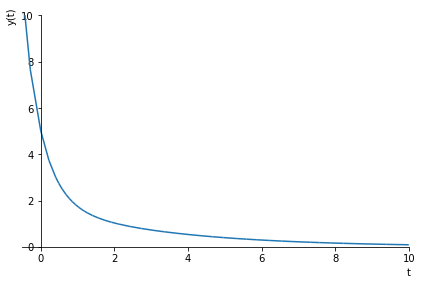

In [11]:
# sym.plot(f.rhs); # this works
# %% Plot
xtol = 1e-3
p1 = plot(sol1.rhs, show=False, xlim=[-0.5,10], ylim=[0,10], ylabel='y(t)')
p1.show()

Another example:

$\hspace{0.5in} y'(t) - 1.2y(t) = 0.8t$ for $y(0) = 0$

In [12]:
# be sure to run previous cells before running the following examples that depend on sympy!

t = sym.symbols('t')
y = sym.Function('y')
y1 = sym.Derivative(y(t), t)
eqdiff = y1 - 1.2*y(t) - 0.8*t
sol2 = sym.dsolve(eqdiff, y(t), ics={y(0): '0'})
sol2

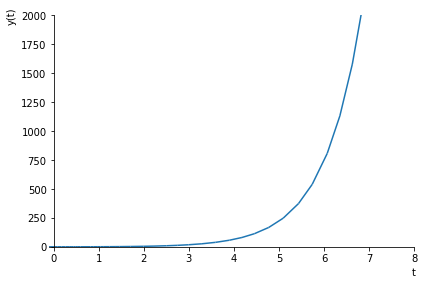

In [13]:
xtol = 1e-3
p2 = plot(sol2.rhs, show=False, xlim=[-0.1,8], ylim=[0,2000], ylabel='y(t)')
p2.show()

Another example:

$\hspace{0.5in} y'(t) + 0.5y(t) = \sin(2t)$ for $y(0) = -2$

In [14]:
t = sym.symbols('t')
y = sym.Function('y')
y1 = sym.Derivative(y(t), t)
eqdiff = y1 + 0.5*y(t) - sym.sin(2*t)
sol3 = sym.dsolve(eqdiff, y(t), ics={y(0): '-2'})
sol3

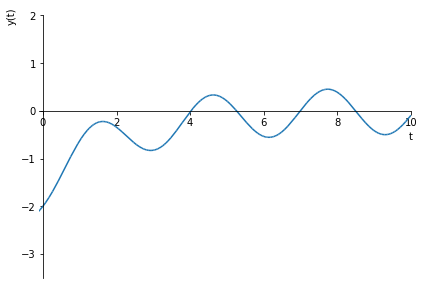

In [15]:
xtol = 1e-3
p3 = plot(sol3.rhs, show=False, xlim=[-0.1,10], ylim=[-3.5,2], ylabel='y(t)')
p3.show()

This is an example of an equation that yields an integral that cannot be evaluated analytically:

$\hspace{0.5in} y'(t) + 0.5y(t) = 3.7e^{\sin(t)}$ for $y(0) = -3$

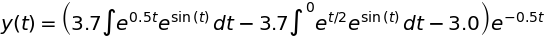

In [16]:
t = sym.symbols('t')
y = sym.Function('y')
y1 = sym.Derivative(y(t), t)
eqdiff = y1 + 0.5*y(t) - 3.7*sym.exp(sym.sin(t))
sol4 = sym.dsolve(eqdiff, y(t), ics={y(0): '-3'})
sol4

$\int e^{0.5t}e^{sin(t)}\mathrm{dt}$ cannot be solved. Most forced exponential differential equations result in integrals that have no closed form solution, so numerical approximation methods (think Taylor or Maclaurin series) are used instead of analytical ones.

Another notable behavior is if $r > 0$ and $y'(t) + ry(t) = f(t)$, then any solutions settle into the same steady state. If $r < 0$, this is unpredictable.

Here is an example of the $r > 0$ case.

$\hspace{0.5in} y'(t) + ry(t) = 4\sin(3t)$

We will set $r$ to a random value and assign three random values to $y(0)$.

(Run it multiple times.)

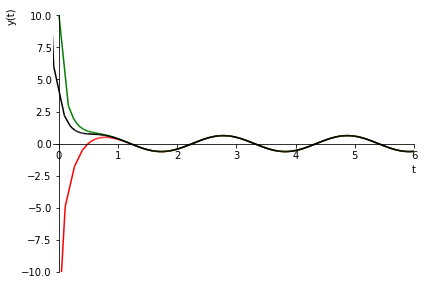

In [17]:
import random
r = round(random.uniform(0.1,10),1)
y0_1 = round(random.uniform(-10,0),1)
y0_2 = round(random.uniform(0.1,10),1)
y0_3 = round(random.uniform(-10,10),1)

t = sym.symbols('t')
y = sym.Function('y')
y1 = sym.Derivative(y(t), t)
eqdiff = y1 + r*y(t) - 4*sym.sin(3*t)

sol5 = sym.dsolve(eqdiff, y(t), ics={y(0): y0_1})
p5 = plot(sol5.rhs, show=False, xlim=[-0.1,6], ylim=[-10,10], line_color='red', ylabel='y(t)')
sol6 = sym.dsolve(eqdiff, y(t), ics={y(0): y0_2})
p6 = plot(sol6.rhs, show=False, ylim=[-10,6], line_color='green')
sol7 = sym.dsolve(eqdiff, y(t), ics={y(0): y0_3})
p7 = plot(sol7.rhs, show=False, ylim=[-10,6], line_color='black')
p5.append(p6[0])
p5.append(p7[0])
p5.show()

Here is another example. In this case, _p_ is another randomized variable.

$\hspace{0.5in} y'(t) + ry(t) = 6e^{-t} + pt$

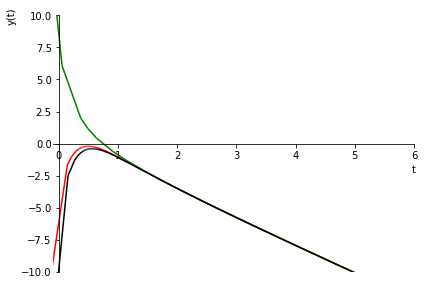

In [18]:
r = round(random.uniform(0.1,10),1)
p = round(random.uniform(-10,10),1)
y0_1 = round(random.uniform(-10,0),1)
y0_2 = round(random.uniform(0.1,10),1)
y0_3 = round(random.uniform(-10,10),1)

t = sym.symbols('t')
y = sym.Function('y')
y1 = sym.Derivative(y(t), t)
eqdiff = y1 + r*y(t) - 6*sym.exp(-t) - p*t

sol8 = sym.dsolve(eqdiff, y(t),  ics={y(0): y0_1})
p8 = plot(sol8.rhs, show=False,   xlim=[-0.1,6], ylim=[-10,10], line_color='red', ylabel='y(t)')
sol9 = sym.dsolve(eqdiff, y(t),  ics={y(0): y0_2})
p9 = plot(sol9.rhs, show=False,   xlim=[-0.1,6], ylim=[-10,10], line_color='green')
sol10 = sym.dsolve(eqdiff, y(t), ics={y(0): y0_3})
p10 = plot(sol10.rhs, show=False, xlim=[-0.1,6], ylim=[-10,10], line_color='black')
p8.append(p9[0])
p8.append(p10[0])
p8.show()

So why do these cases settle out to common steady-state values?

Consider $y(t) = ke^{-rt} + e^{-rt}\int\limits_0^t e^{rs}f(s) \, \mathrm{d} s\,$ as $t$ gets arbitrarily large. In that case, $ke^{-rt}$ tends to 0 leaving just the second term, which determines the steady-state behavior. More specifically, $f(t)$ in the forced equation $y'(t) + ry(t) = f(t)$ determines it. But if $r < 0$, this is not the case. Consider this equation:

$\hspace{0.5in} y'(t) - 0.1y(t) = sin(2t)$

(Run several times.)

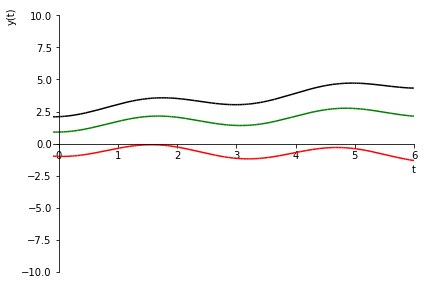

In [19]:
r = -0.1
y0_1 = round(random.uniform(-5,0),1)
y0_2 = round(random.uniform(0.1,5),1)
y0_3 = round(random.uniform(-5,5),1)

t = sym.symbols('t')
y = sym.Function('y')
y1 = sym.Derivative(y(t), t)
eqdiff = y1 + r*y(t) - sym.sin(2*t)

sol11 = sym.dsolve(eqdiff, y(t), ics={y(0): y0_1})
p11 = plot(sol11.rhs, show=False, xlim=[-0.1,6], ylim=[-10,10], line_color='red', ylabel='y(t)')
sol12 = sym.dsolve(eqdiff, y(t), ics={y(0): y0_2})
p12 = plot(sol12.rhs, show=False, xlim=[-0.1,6], ylim=[-10,10], line_color='green')
sol13 = sym.dsolve(eqdiff, y(t), ics={y(0): y0_3})
p13 = plot(sol13.rhs, show=False, xlim=[-0.1,6], ylim=[-10,10], line_color='black')
p11.append(p12[0])
p11.append(p13[0])
p11.show()

These solutions do not converge to a steady state.

With $r < 0$, the $ke^{-rt}$ term of the solution equation does not tend to 0 but gets arbitrarily large. This can cause the solutions to diverge.

### Application of First Order Linear Differential Equations

Compound interest is a context is which differential equations apply. 

Assume you have \\$1000 that is earning 4% interest. How much money would you have if the interest were compounded annually for 10 years? Here is the equation where $y(t)$ is the balance at time $t$.

$\hspace{0.5in}(8)\hspace{0.25in}y(t) = 1000e^{0.04t}$

In [20]:
t=10
y_t = 1000*np.exp(0.04*t)
print("y(10) =",round(y_t,2))

y(10) = 1491.82


See it graphically:

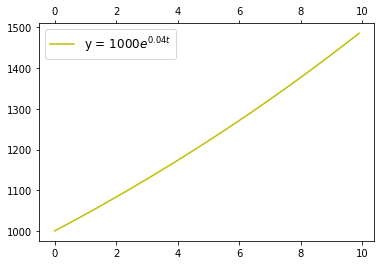

In [21]:
t = np.arange(0, 10, 0.1)
y = 1000*np.exp(0.04*t)
plt.plot(t, y, 'y', label="y = $1000e^{0.04t}$")
plt.legend(loc='upper left');

Differentiation of both sides of (8) yields this:

$\hspace{0.5in}y'(t) = 0.04\times1000e^{0.04t}$

which is equivalent to this:

$\hspace{0.5in}y'(t) = 0.04y(t)$

which is the same as this unforced differential equation with $y(0) = 1000$:

$\hspace{0.5in}y'(t) - 0.04y(t) = 0$

Understand what this means. The rate of change of money with respect to time minus 0.04 times the amount of money are the same. Now suppose you want to add \\$200 to the account each year. Our equation then becomes this:

$\hspace{0.5in}y'(t) − 0.4y(t) = 200, y(0) = 1000$

which we recognize as a forced differential equation. The solution will be of this form:

$\hspace{0.5in}y(t) = 1000e^{0.4t} + e^{0.4t}\int_0^{10}\,e^{−0.4s} \times 200\,\mathrm{d}s$

The symbolic solution in Python is as follows:

In [22]:
t = sym.symbols('t')
y = sym.Function('y')
y1 = sym.Derivative(y(t), t)
eqdiff = y1 - 0.04*y(t) - 200
sol1 = sym.dsolve(eqdiff, y(t), ics={y(0): '1000'})
sol1

and with $t = 10$, we have this:

In [23]:
sol1.subs(t, 10)

See it graphically:

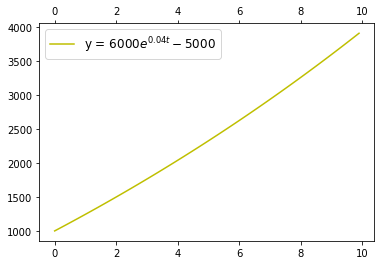

In [24]:
t = np.arange(0, 10, 0.1)
y = 6000*np.exp(0.04*t) - 5000
plt.plot(t, y, 'y', label="y = $6000e^{0.04t} - 5000$")
plt.legend(loc='upper left');

Using the same growth rate and initial value, how much money would you need to contribute on an annual basis to have  \\$10000 in 10 years? This means we want to solve for d:

$\hspace{0.5in}y'(t) − 0.04y(t) = d, y(0) = 1000$

so that $y(10) = 10000$. Here is a solution in Python:

d = 691.97


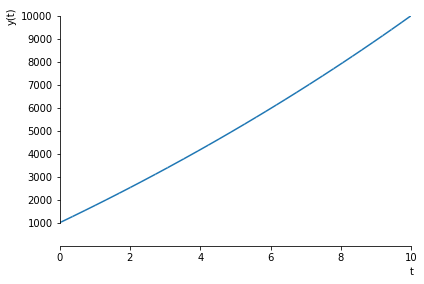

In [25]:
y = sym.Function('y')
t, d = sym.symbols('t d')
y1 = sym.Derivative(y(t), t)
eqdiff = y1 - 0.04*y(t) - d
sol2 = sym.dsolve(eqdiff, y(t), ics={y(0): '1000'})
dval = sym.solve(sol2.subs(t, 10).subs(y(10), 10000), d)
print("d =", dval[0].n(5))
sol3 = sol2.subs(d, dval[0].n(5))
# print(sol3.rhs)
p14 = plot(sol3.rhs, show=False, xlim=[0,10], ylim=[1000,10000], ylabel='y(t)')
p14.show()

Written by Dan Liddell. October, 2021.

These sources were consulted in preparing this content and provided ideas, examples, and source code for this material:

[https://personal.math.ubc.ca/~pwalls/math-python/](https://personal.math.ubc.ca/~pwalls/math-python/)

[https://www.scipy.org/docs.html](https://www.scipy.org/docs.html)

[https://stackexchange.com/](https://stackexchange.com/)

[https://stackoverflow.com/](https://stackoverflow.com/)

A generous amount of credit goes to the following:

    Davis, Bill and Jerry Uhl. Differential Equations&Mathematica [sic]. version 6.0. 
    Math Everywhere, Inc., 2007. Published as a Mathematica notebook. 

    Math 285 -- Introduction to Differential Equations course at University of Illinois at Urbana-Champaign.

